<a href="https://colab.research.google.com/github/KanishkaKelkar/ML-Classification_Model/blob/main/Abalone_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
cols = ["Sex", "Length","Diameter", "Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings"]
df = pd.read_csv("abalone.data", header=None, names=cols)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


**EDA & Data Preprocessing**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


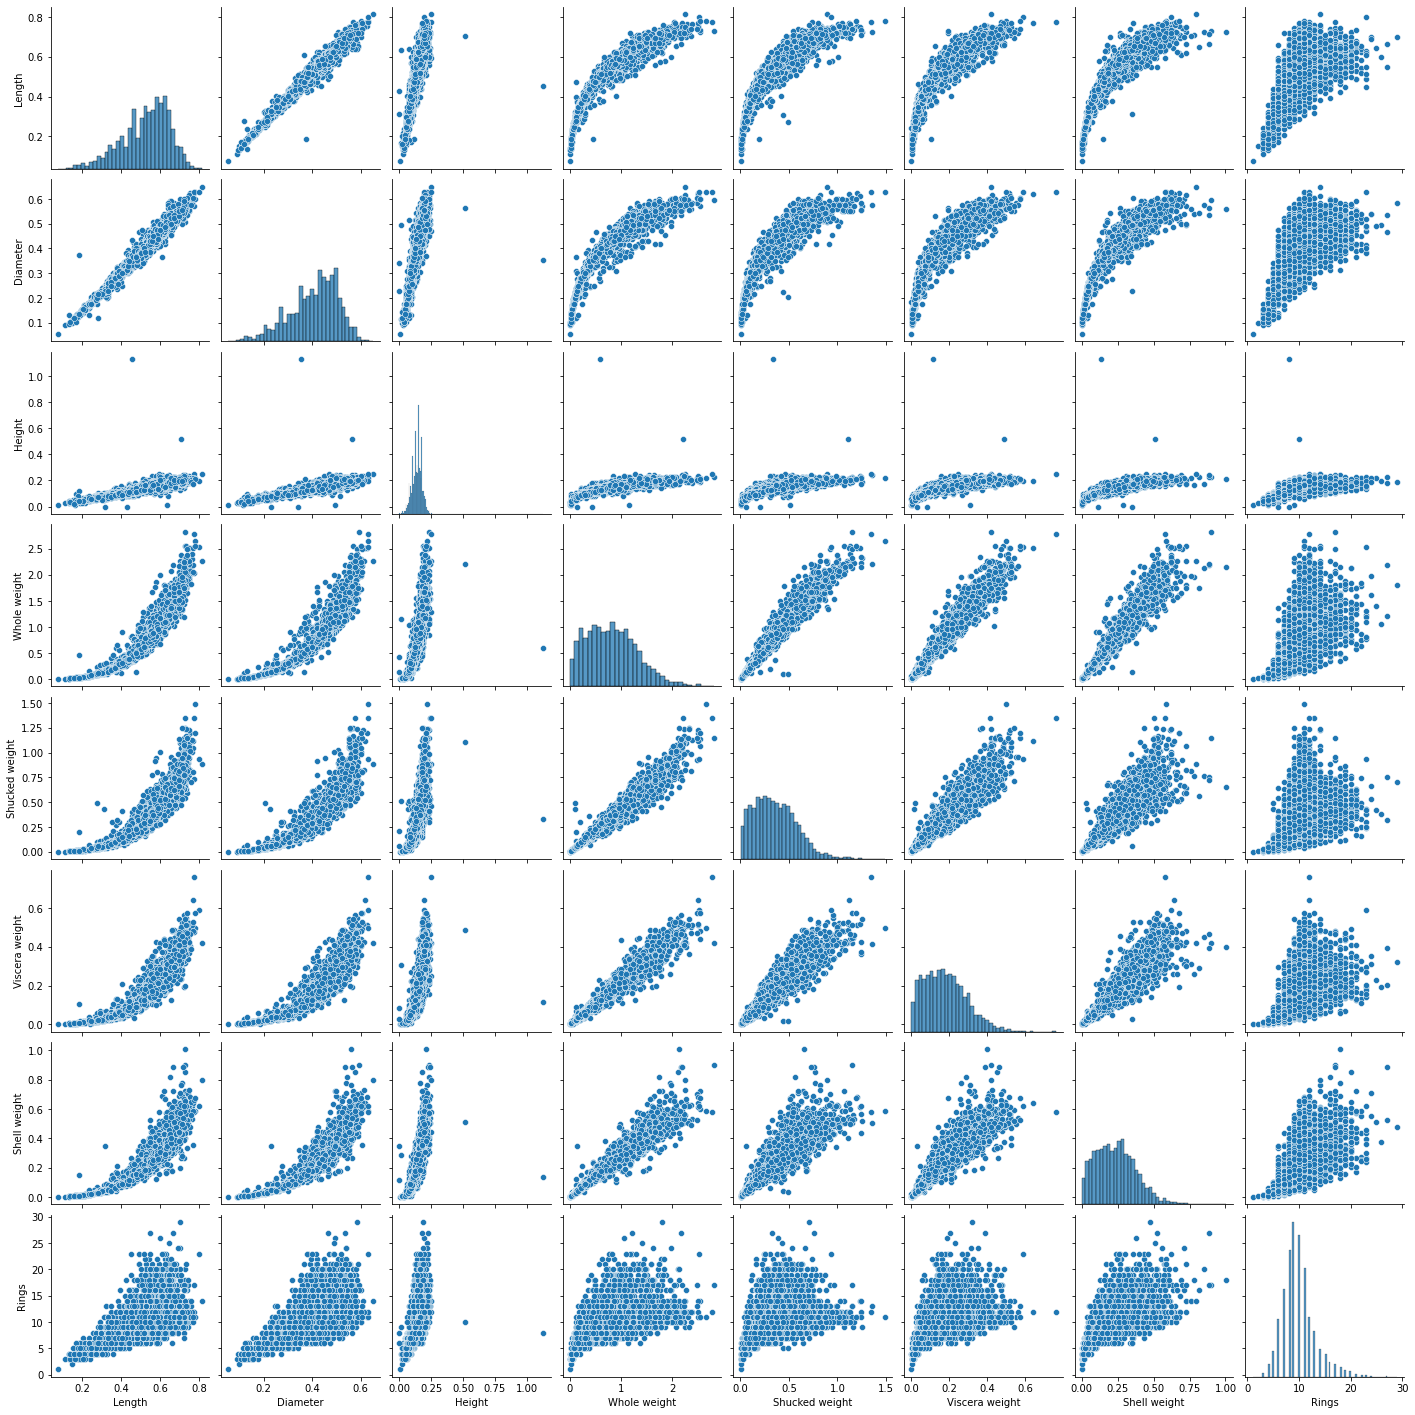

In [ ]:
sns.pairplot(df)

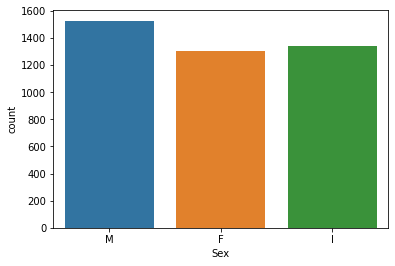

In [ ]:
sns.countplot(x='Sex',data=df)

In [ ]:
# Encoding Categorial data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

In [ ]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
# Scaling
from sklearn.preprocessing import StandardScaler
for col in df:
    sc = StandardScaler()
    df[col]= sc.fit_transform(df[[col]])

In [ ]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1.151980,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,1.151980,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,-1.280690,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,1.151980,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-0.064355,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013
...,...,...,...,...,...,...,...,...,...
4172,-1.280690,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,0.330765
4173,1.151980,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685,0.020571
4174,1.151980,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,-0.289624
4175,-1.280690,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,0.020571


Kmeans Clustering

In [ ]:
x = df.iloc[:,1:].values

In [ ]:
x

array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.72621157,
        -0.63821689,  1.57154357],
       [-1.44898585, -1.439929  , -1.18397831, ..., -1.20522124,
        -1.21298732, -0.91001299],
       [ 0.05003309,  0.12213032, -0.10799087, ..., -0.35668983,
        -0.20713907, -0.28962385],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ...,  0.97541324,
         0.49695471, -0.28962385],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  0.73362741,
         0.41073914,  0.02057072],
       [ 1.54905203,  1.48263359,  1.32665906, ...,  1.78744868,
         1.84048058,  0.64095986]])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [ ]:
wcss

[33416.0,
 14612.656454120586,
 9924.224827583474,
 7867.568002118308,
 6799.336261730827,
 5837.57955228612,
 5282.154783321099,
 4752.506311970771,
 4288.2972655432395,
 3928.980284114663]

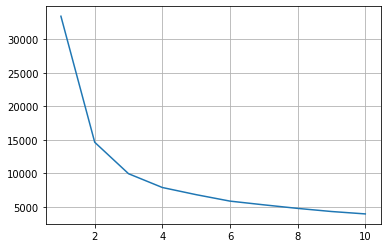

In [ ]:
plt.plot(range(1,11), wcss)
plt.grid(True)
plt.show()

In [ ]:
kmeans= KMeans(n_clusters=3, random_state=1)
ykmeans = kmeans.fit_predict(x)

In [ ]:
ykmeans

array([0, 1, 0, ..., 2, 2, 2], dtype=int32)

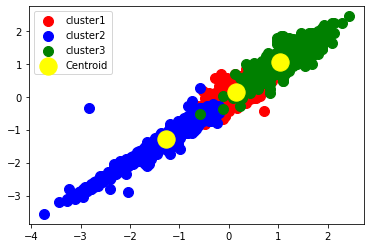

In [ ]:
plt.scatter(x[ykmeans==0,0], x[ykmeans==0,1], s=100, c="red", label="cluster1")
plt.scatter(x[ykmeans==1,0], x[ykmeans==1,1], s=100, c="blue", label="cluster2")
plt.scatter(x[ykmeans==2,0], x[ykmeans==2,1], s=100, c="green", label="cluster3")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s=300, c="yellow", label="Centroid")

plt.legend()
plt.show()

In [ ]:
ykmeans

array([0, 1, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
df["Target"] = ykmeans

In [ ]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Target
0,1.151980,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544,0
1,1.151980,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013,1
2,-1.280690,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624,0
3,1.151980,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571,0
4,-0.064355,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013,1
...,...,...,...,...,...,...,...,...,...,...
4172,-1.280690,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,0.330765,0
4173,1.151980,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685,0.020571,0
4174,1.151980,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,-0.289624,2
4175,-1.280690,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,0.020571,2


Data Analysis

In [ ]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Target
count,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4177.000000
mean,1.747332e-16,-6.651770e-16,-3.957146e-16,5.082520e-16,1.206706e-16,-1.180127e-17,-1.817502e-16,3.750890e-16,1.505698e-15,0.860905
std,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,0.833935
min,-1.280690e+00,-3.739154e+00,-3.556267e+00,-3.335953e+00,-1.686092e+00,-1.614731e+00,-1.643173e+00,-1.705134e+00,-2.771180e+00,0.000000
25%,-1.280690e+00,-6.161975e-01,-5.833158e-01,-5.862075e-01,-7.897577e-01,-7.811585e-01,-7.946415e-01,-7.819095e-01,-5.998184e-01,0.000000
50%,-6.435480e-02,1.749513e-01,1.725193e-01,1.156329e-02,-5.963767e-02,-1.052891e-01,-8.753202e-02,-3.470794e-02,-2.896238e-01,1.000000
75%,1.151980e+00,7.579031e-01,7.267984e-01,6.093341e-01,6.613049e-01,6.426730e-01,6.606355e-01,6.478319e-01,3.307653e-01,2.000000
max,1.151980e+00,2.423480e+00,2.440025e+00,2.368329e+01,4.072271e+00,5.085388e+00,5.286500e+00,5.504642e+00,5.914268e+00,2.000000


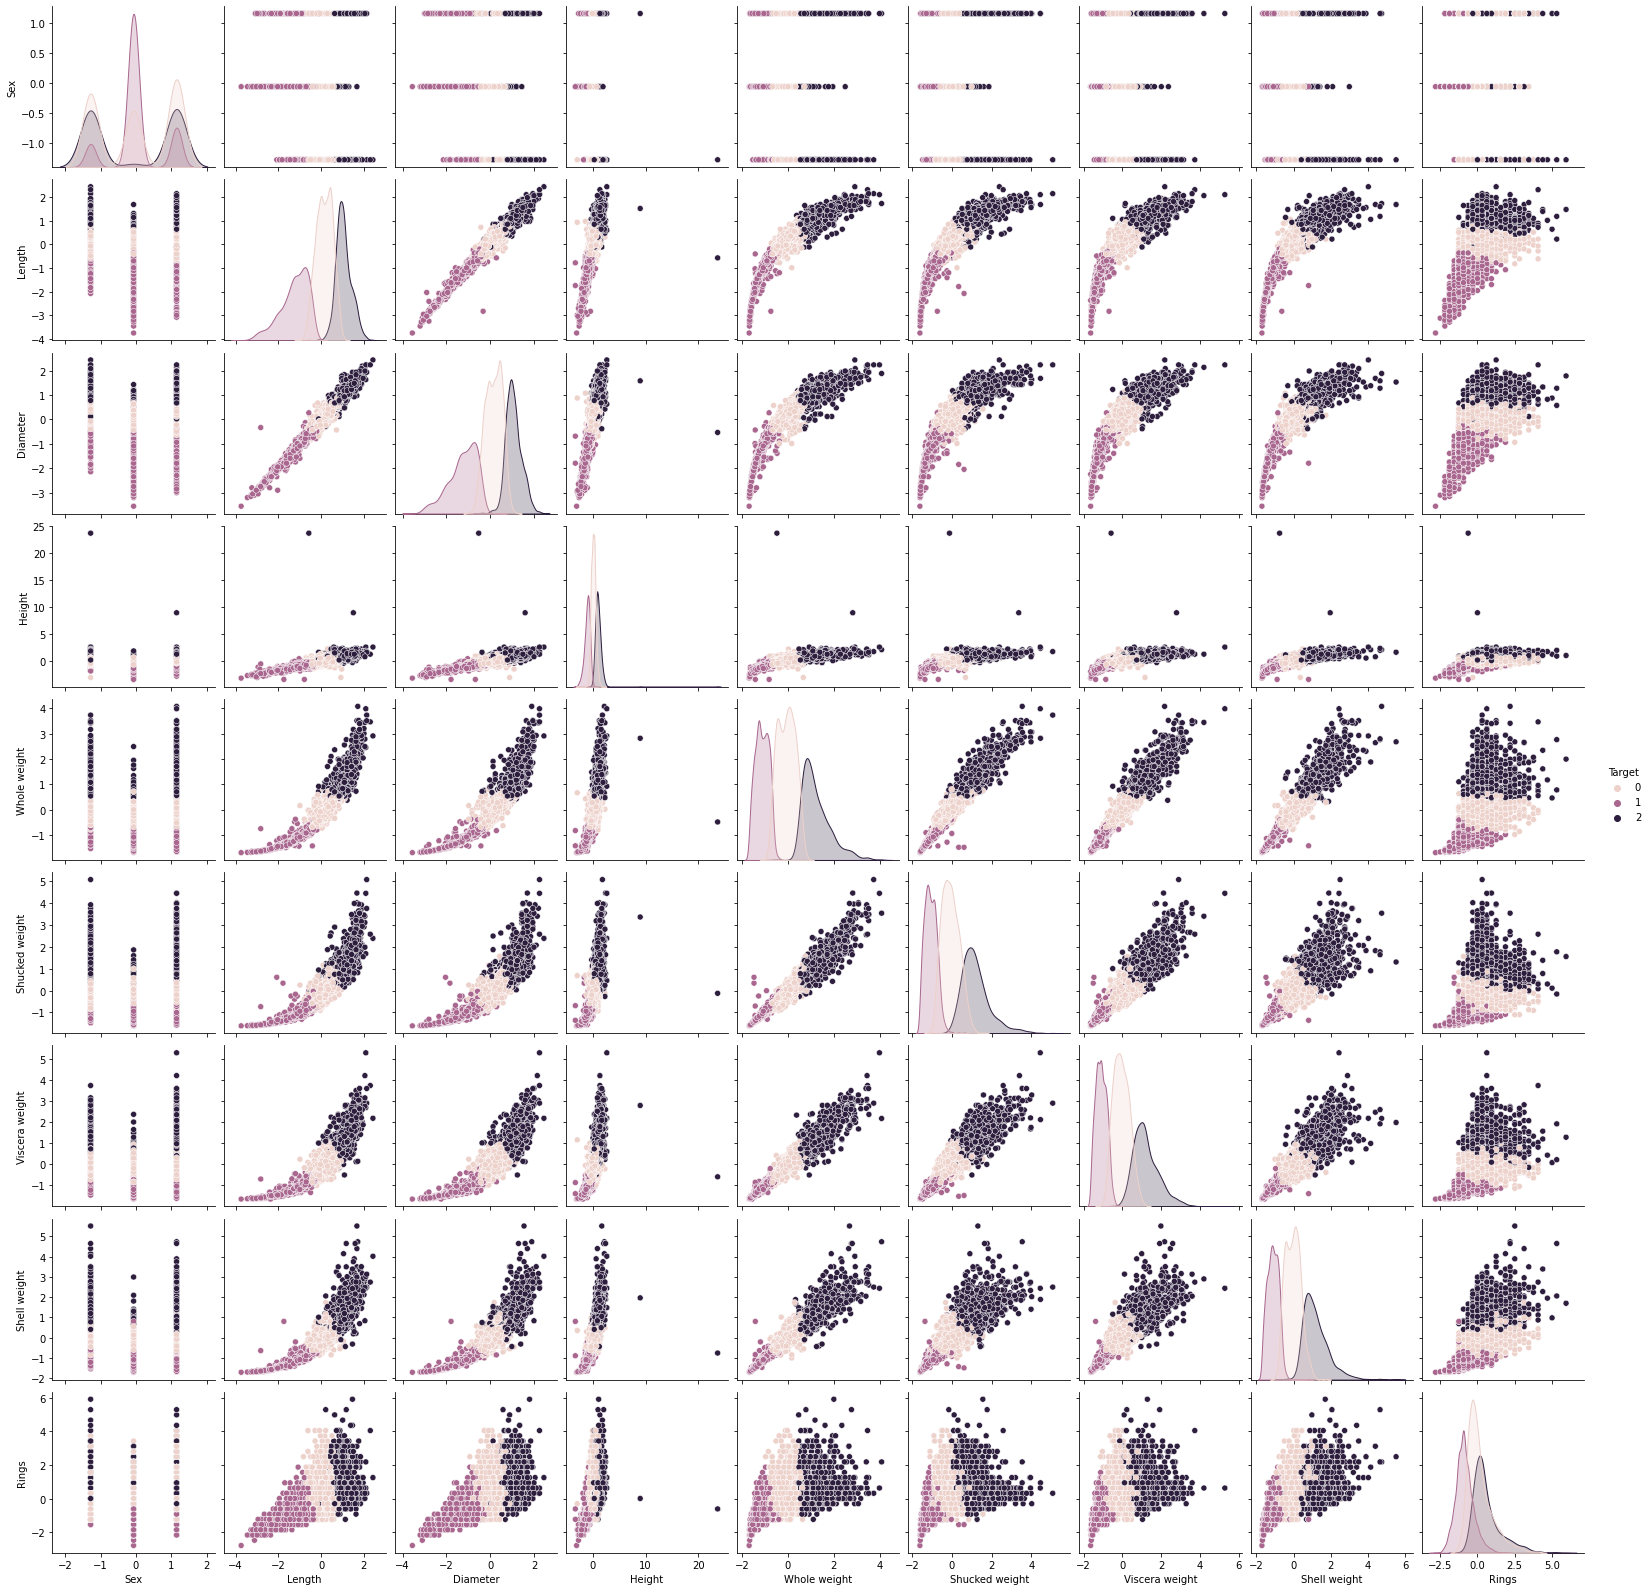

In [ ]:
sns.pairplot(df,hue="Target")

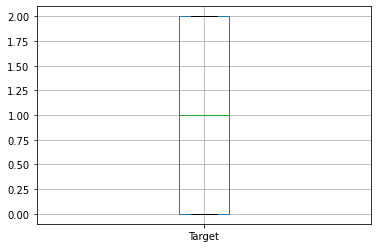

In [ ]:
df.boxplot('Target')

In [ ]:
df.Target.value_counts()
# We can observe that '0' has highest number of value count

0    1783
2    1202
1    1192
Name: Target, dtype: int64

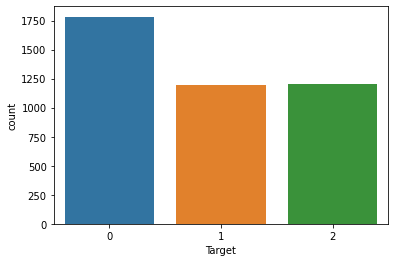

In [ ]:
sns.countplot(x='Target',data=df)

In [ ]:
# Corelation
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Target
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627,-0.025235
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,0.285383
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,0.289143
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,0.300927
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,0.462747
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,0.450954
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,0.453991
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,0.435047
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,0.139779
Target,-0.025235,0.285383,0.289143,0.300927,0.462747,0.450954,0.453991,0.435047,0.139779,1.000000


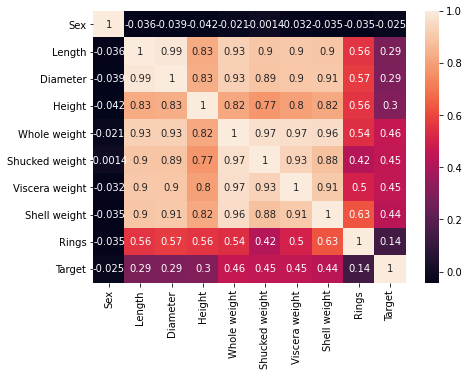

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
# Corelation with Target
df.corr()['Target'].sort_values()

Sex              -0.025235
Rings             0.139779
Length            0.285383
Diameter          0.289143
Height            0.300927
Shell weight      0.435047
Shucked weight    0.450954
Viscera weight    0.453991
Whole weight      0.462747
Target            1.000000
Name: Target, dtype: float64

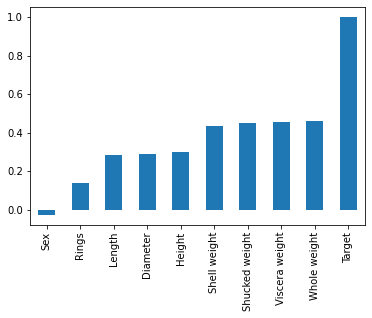

In [ ]:
df.corr()['Target'].sort_values().plot(kind="bar")

**Model Creation**

In [ ]:
# Divide into x & y
x = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.33, random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    print(f"\nConfusion Matrix-:\n{confusion_matrix(ytest, ypred)}\n\nClassification Report-: \n{classification_report(ytest, ypred)}\n")

In [ ]:
models = []

models.append(("KNN    -:", KNeighborsClassifier(n_neighbors=3)))
models.append(("Loreg  -:", LogisticRegression())
models.append(("SVM-L  -:", SVC()))
models.append(("DT-g   -:", DecisionTreeClassifier(criterion="gini")))
models.append(("DT-e   -:", DecisionTreeClassifier(criterion="entropy")))
models.append(("RF  -:", RandomForestClassifier()))

for name, model in models:
    print(name)
    mymodel(model)

KNN    -:

Confusion Matrix-:
[[565   7  11]
 [  6 388   0]
 [ 16   0 386]]

Classification Report-: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       583
           1       0.98      0.98      0.98       394
           2       0.97      0.96      0.97       402

    accuracy                           0.97      1379
   macro avg       0.97      0.97      0.97      1379
weighted avg       0.97      0.97      0.97      1379


Loreg  -:

Confusion Matrix-:
[[578   2   3]
 [  0 394   0]
 [  3   0 399]]

Classification Report-: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       583
           1       0.99      1.00      1.00       394
           2       0.99      0.99      0.99       402

    accuracy                           0.99      1379
   macro avg       0.99      0.99      0.99      1379
weighted avg       0.99      0.99      0.99      1379


SVM-L  -:

Confusion Matrix-:
[[

Voting classfier

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
models = [
 ('Loreg  -:', LogisticRegression()),
 ("SVM-L  -:", SVC(kernel="linear")),
 ("RF  -:", RandomForestClassifier())
]

In [ ]:
vch =VotingClassifier(estimators = models)
vch.fit(xtrain, ytrain)
ypred = vch.predict(xtest)

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       583
           1       0.99      1.00      1.00       394
           2       0.99      0.99      0.99       402

    accuracy                           0.99      1379
   macro avg       0.99      0.99      0.99      1379
weighted avg       0.99      0.99      0.99      1379



Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


models = []

models.append(("Ada -: ", AdaBoostClassifier(n_estimators=100)))
models.append(("GBC -:" , GradientBoostingClassifier(n_estimators=100)))
models.append(("XGB -:", XGBClassifier(n_estimators=100)))

for name, model in models:
    print(name)
    mymodel(model)

Ada -: 

Confusion Matrix-:
[[528  29  26]
 [ 20 374   0]
 [ 18   0 384]]

Classification Report-: 
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       583
           1       0.93      0.95      0.94       394
           2       0.94      0.96      0.95       402

    accuracy                           0.93      1379
   macro avg       0.93      0.94      0.93      1379
weighted avg       0.93      0.93      0.93      1379


GBC -:

Confusion Matrix-:
[[562  12   9]
 [  7 387   0]
 [ 13   0 389]]

Classification Report-: 
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       583
           1       0.97      0.98      0.98       394
           2       0.98      0.97      0.97       402

    accuracy                           0.97      1379
   macro avg       0.97      0.97      0.97      1379
weighted avg       0.97      0.97      0.97      1379


XGB -:

Confusion Matrix-:
[[565  11 

**Hyperparameter Tunning**

In [ ]:
from sklearn.model_selection import GridSearchCV

GBC = GradientBoostingClassifier()

In [ ]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

In [ ]:
grid_GBC = GridSearchCV(estimator=GBC, param_grid = parameters, cv = 2, n_jobs=-1, verbose=True)
grid_GBC.fit(xtrain, ytrain)

Fitting 2 folds for each of 256 candidates, totalling 512 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 40.2min
[Parallel(n_jobs=-1)]: Done 512 out of 512 | elapsed: 45.2min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBC.best_estimator_)
print("\n The best parameters across ALL searched params:\n",grid_GBC.best_params_)

print("\n The best score across ALL searched params:\n",grid_GBC.best_score_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.04, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.2, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

 The best parameters across ALL searched params:
 {'learning_rate': 0.04, 'max_depth': 4, 'n_estimators': 1500, 'subsample': 0.2}

 The best score across ALL searched params:
 0.9781987133666905


Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cvs = cross_val_score(GradientBoostingClassifier(), x, y, cv=4)
print(f"Avg Accuracy -: {cvs.mean()} ")
print(f"StD -: {cvs.std()} ")

Avg Accuracy -: 0.9753402903811252 
StD -: 0.00461632729203904 
